# **Tarea 1**

## _Punto 1:_

Para el problema de multi-armed bandit, implemente un banco de pruebas (testbed) similar al considerado en clase y en el libro de texto, pero con 15 acciones con 𝑞∗(𝑎𝑘) generadas aleatoriamente de acuerdo a una distribución normal con media 10 y varianza 4, y cada acción con varianza de 2.
Resuelva el problema de maximizar la suma de recompensas en un horizonte de tiempo de 5000 iteraciones con los siguientes algoritmos (implementados por usted):

- ϵ-greedy con recompensa promedio.
- Gradient Bandit.

    Para cada caso ajuste apropiadamente los parámetros requeridos (𝛼,𝜖), y grafique el desempeño de los algoritmos en términos de recompensa recibida y porcentaje de iteraciones en que se selecciona la acción óptima.

### Implementación

Se realzia la importación de las librerías requeridas

In [4]:
import numpy as np
import matplotlib.pyplot as plt

El enunciado del problema, da los siguientes valores para la parametrización del problema:

In [5]:
k = 15 #Numero de acciones
promedio = 10 # promedio q*(ak)
varianza_r = 4 # varainza q*(ak)
var_recompensa = 2 # varianza de las recompensas
iteraciones = 5000 # numero de iteraciones
num_experimentos = 1000 # numero de experimentos

Se define la función que gener valores de q*(ak)

In [6]:
def valores_verdaderos_q():
  return np.random.normal(promedio, np.sqrt(varianza_r), k)

Se fefine la función que genera valores de recompensa para el testbed

In [7]:
def valores_recompensa(q_valores_verdaderos, accion_tomada):
  return np.random.normal(q_valores_verdaderos[accion_tomada], np.sqrt(var_recompensa))

Se realiza la implementación del algoritmo epsilon-greedy

In [9]:
def epsilon_greedy(epsilon, alpha=None):
  # Se inicializa la recompensa y la acciones en cero
  recompensa_promedio = np.zeros(iteraciones)
  accion_optima_recuento = np.zeros(iteraciones)

  for experimento in range(num_experimentos):
    q_valores_verdaderos = valores_verdaderos_q()
    q_estimado = np.zeros(k) # valor inicial de las acciones
    recuento_acciones = np.zeros(k) # numero de veces que se selecciona la accion

    accion_optima = np.argmax(q_valores_verdaderos)

    #En esta parte se hace la seleccion de la accion que puede ser por explotacion o exploracion
    for t in range(iteraciones):
      if np.random.rand() < epsilon:
        accion = np.random.choice(k) # en esta parte se hace por exploracion
      else:
        accion = np.argmax(q_estimado) # en esta parte se hace por explotacion

      recompensa = valores_recompensa(q_valores_verdaderos, accion) # recompensa generada
      recuento_acciones[accion] += 1 # actualiza de recompensa de la accion

      if alpha is None:
        q_estimado[accion] += (recompensa - q_estimado[accion]) / recuento_acciones[accion] # para caso estacionario
      else:
        q_estimado[accion] += alpha*(recompensa-q_estimado[accion]) # para caso no estacionario en el que se quiere penalizar si varia en el tiempo

      recompensa_promedio[t] += recompensa
      if accion == accion_optima:
        accion_optima_recuento[t] += 1

  recompensa_promedio /= num_experimentos
  accion_optima_recuento /= num_experimentos

  return recompensa_promedio, accion_optima_recuento

Se definen valores de epsilon para contrastar en el testbed

In [10]:
epsilons = [0, 0.1, 0.05, 0.01] # en esta parte se pueden cambiar los valores de epsilon

Se ejecutan los experimentos para cada valor de epsilon y almacenar resultados

In [11]:
def obtener_resultados(valores):
    res = {}
    for epsilon in valores:
        resultado = epsilon_greedy(epsilon)
        res[epsilon] = resultado
    return res

resultados = obtener_resultados(epsilons)

Se realizán las graficas del testbed para contrastar los resultados de recompensas y selección optima durante las iteraciones

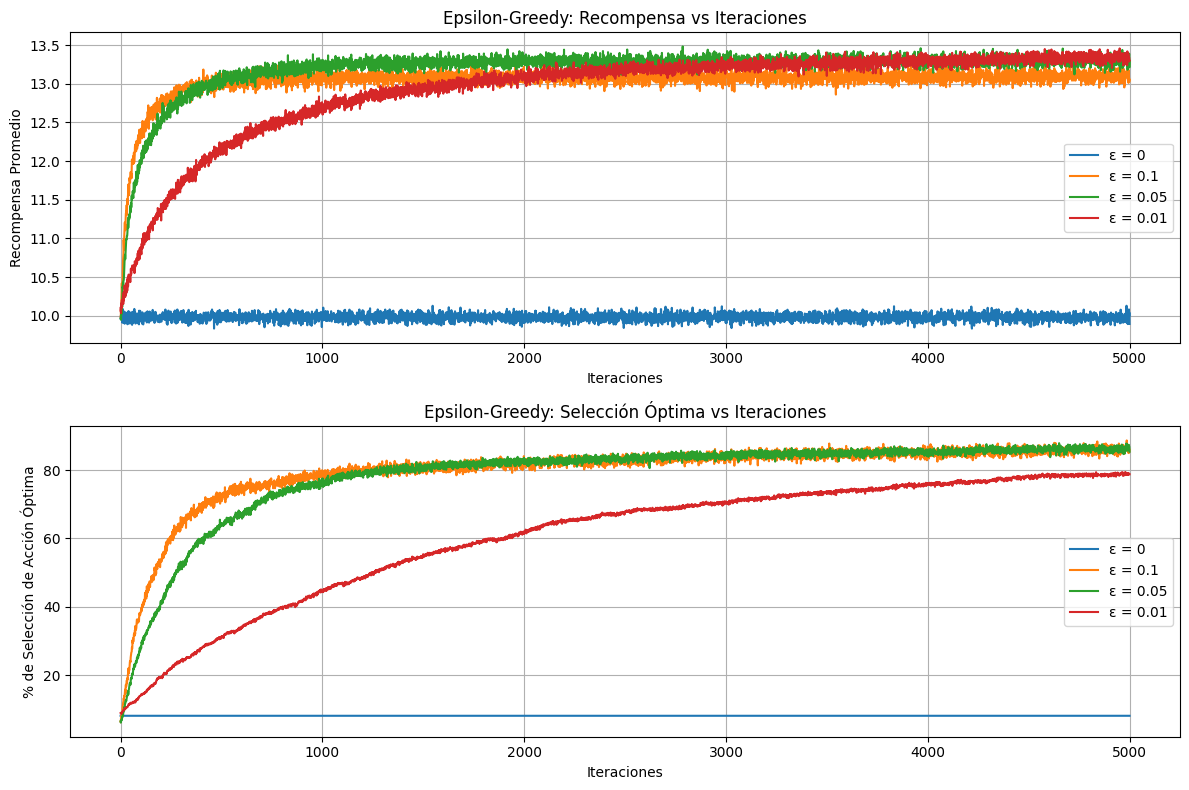

In [12]:
plt.figure(figsize=(12, 8))  # Ajustar el tamaño para mejor visibilidad

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for epsilon, (recompensa, _) in resultados.items():
    plt.plot(recompensa, label=f'ε = {epsilon}', linewidth=1.5)  # Línea más gruesa
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Epsilon-Greedy: Recompensa vs Iteraciones')
plt.legend(loc='best')  # Mejor ubicación de la leyenda
plt.grid(True)  # Agregar una cuadrícula

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for epsilon, (_, porcentaje_optimo) in resultados.items():
    plt.plot(porcentaje_optimo * 100, label=f'ε = {epsilon}', linewidth=1.5)  # Convertir a porcentaje
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Epsilon-Greedy: Selección Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

## _Punto 2:_

Repita el problema anterior, pero ahora con cada acción con varianza 4.

### Implementación

El enunciado del problema, da los siguientes valores para la parametrización del problema:

In [13]:
var_recompensa = 4 # varianza de las recompensas

Se ejecutan los experimentos para cada valor de epsilon y almacenar resultados

In [14]:
resultados2 = obtener_resultados(epsilons)

Se realizán las graficas del testbed para contrastar los resultados de recompensas y selección optima durante las iteraciones

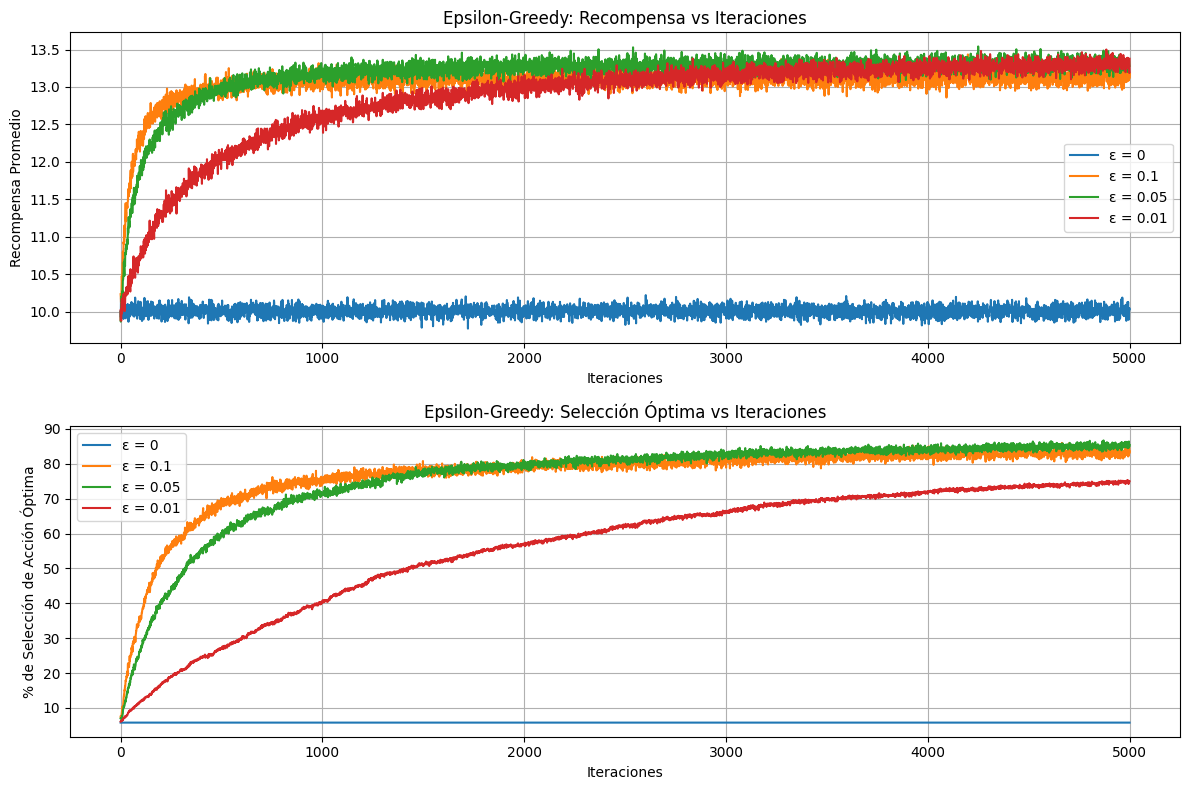

In [15]:
plt.figure(figsize=(12, 8))  # Ajustar el tamaño para mejor visibilidad

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for epsilon, (recompensa, _) in resultados2.items():
    plt.plot(recompensa, label=f'ε = {epsilon}', linewidth=1.5)  # Línea más gruesa
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Epsilon-Greedy: Recompensa vs Iteraciones')
plt.legend(loc='best')  # Mejor ubicación de la leyenda
plt.grid(True)  # Agregar una cuadrícula

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for epsilon, (_, porcentaje_optimo) in resultados2.items():
    plt.plot(porcentaje_optimo * 100, label=f'ε = {epsilon}', linewidth=1.5)  # Convertir a porcentaje
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Epsilon-Greedy: Selección Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

Para contrastar los resultados, entre los datos obtenidos en el punto 1 y el punto 2, se tiene:

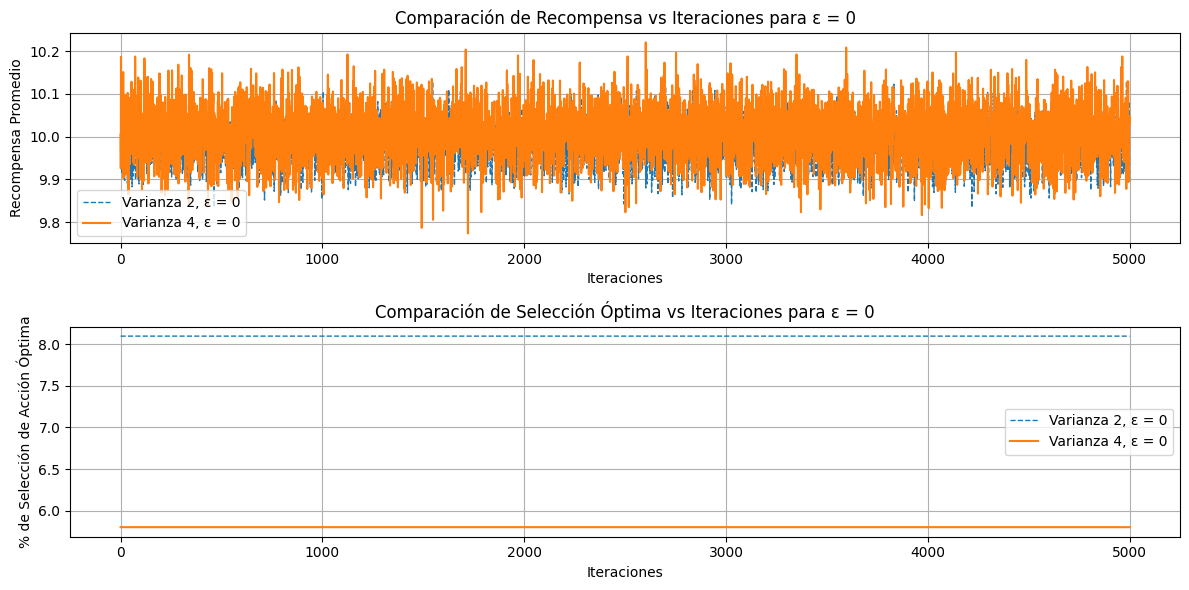

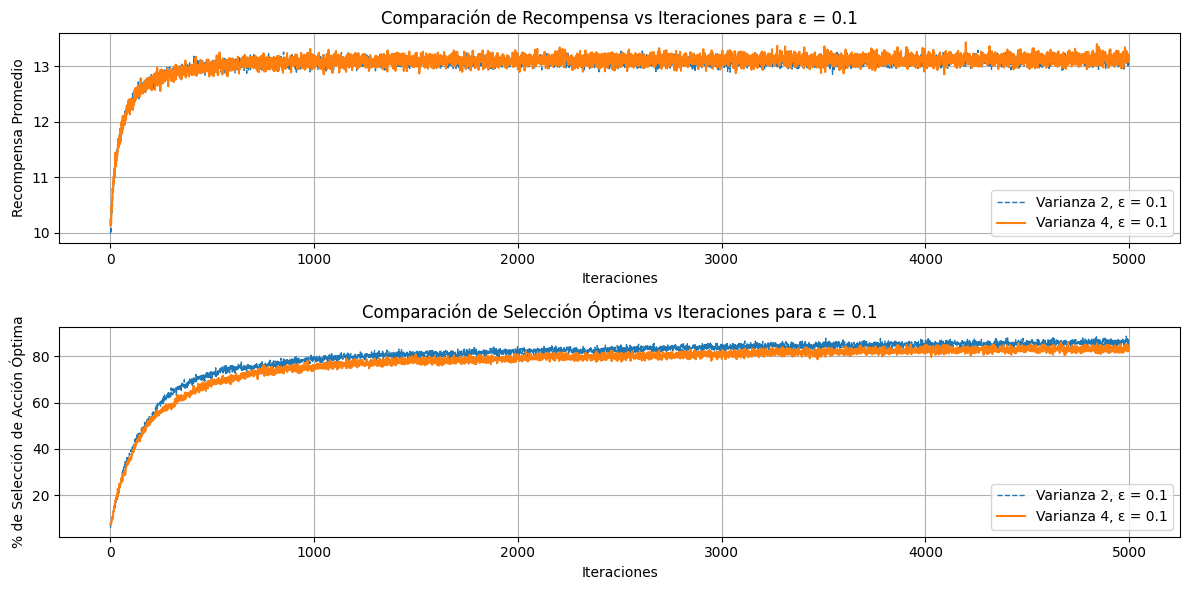

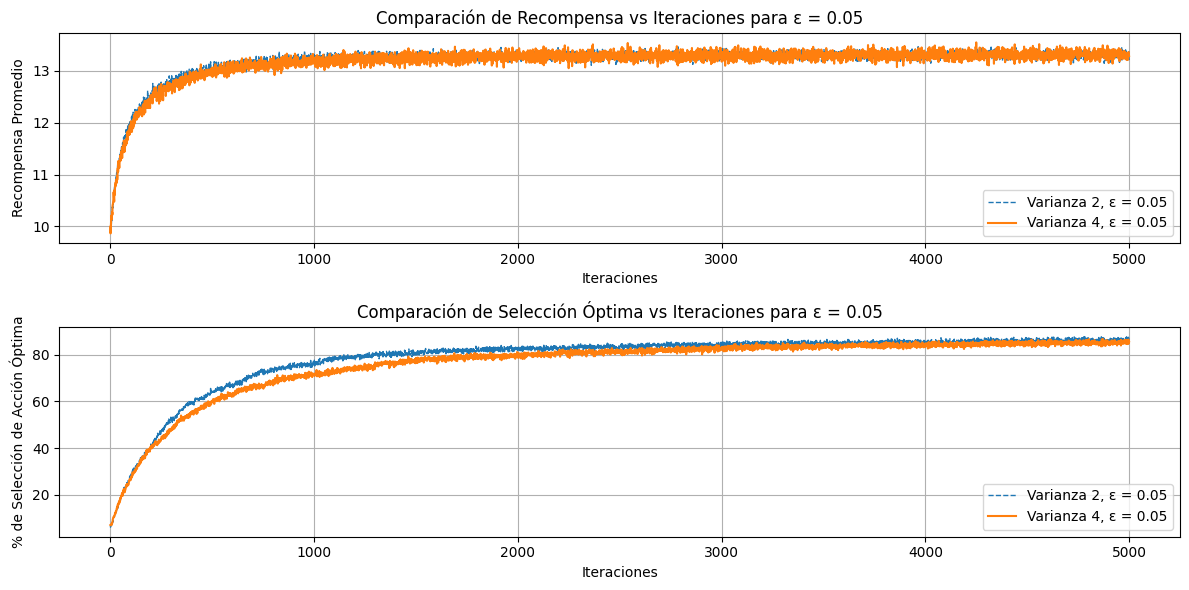

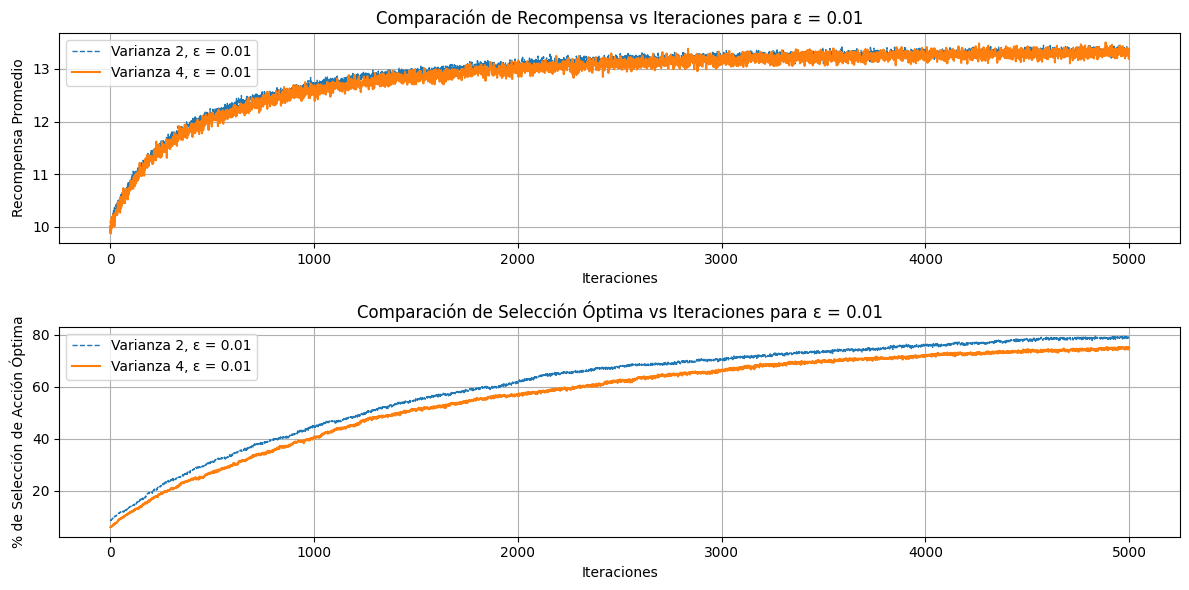

In [18]:
for epsilon in epsilons:
    plt.figure(figsize=(12, 6))
    
    # Subgráfica 1: Comparación de recompensa promedio
    plt.subplot(2, 1, 1)
    plt.plot(resultados[epsilon][0], '--', label=f'Varianza 2, ε = {epsilon}', linewidth=1)
    plt.plot(resultados2[epsilon][0], label=f'Varianza 4, ε = {epsilon}', linewidth=1.5)
    plt.xlabel('Iteraciones')
    plt.ylabel('Recompensa Promedio')
    plt.title(f'Comparación de Recompensa vs Iteraciones para ε = {epsilon}')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Subgráfica 2: Comparación de selección óptima
    plt.subplot(2, 1, 2)
    plt.plot(resultados[epsilon][1] * 100, '--', label=f'Varianza 2, ε = {epsilon}', linewidth=1)
    plt.plot(resultados2[epsilon][1] * 100, label=f'Varianza 4, ε = {epsilon}', linewidth=1.5)
    plt.xlabel('Iteraciones')
    plt.ylabel('% de Selección de Acción Óptima')
    plt.title(f'Comparación de Selección Óptima vs Iteraciones para ε = {epsilon}')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()